# 1 Импортируемые библиотеки

In [1]:
%matplotlib inline 
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread, imshow, imsave 
from scipy.signal import convolve2d
from math import pi, exp

# 2 Гауссовская пирамида

In [2]:
def get_gauss_filter(sigma): 
    """
    Получает на вход значение sigma 
    Возвращает двумерный список - ядро гауссовского фильтра
    """ 
    k = int(round(sigma * 3) * 2 + 1)
    g = [[0] * k for _ in range(k)] 
    for i in range(k):
        for j in range(k):
            x = i - k // 2 
            y = j - k // 2
            g[i][j] = 1 / (2 * pi * sigma**2) * exp((- x**2 - y**2) / (2 * sigma**2))
    s = sum(map(sum, g))
    for i in range(k):
        for j in range(k):
            g[i][j] /= s
    return np.array(g)

def apply_gauss_filter(image, sigma):
    """
    Получает на вход изображение и значение sigma 
    Возвращает изображение, отфильтрованное фильтром гаусса
    """
    core = get_gauss_filter(sigma) 
    channels = [image[:, :, i] for i in range(3)]
    filtered_channels = [] 
    for channel in channels:
        filtered = np.clip(convolve2d(channel, core, mode='same', boundary='symm'), 0, 255)
        filtered_channels.append(filtered) 
    return np.dstack(filtered_channels)

def get_gauss_pyramid(image, sigma, n_layers): 
    """
    Получает гауссовскую пирамиду с заданными sigma и количеством слоев
    Возвращает пирамиду
    """
    pyramid = [apply_gauss_filter(image, sigma)]
    for _ in range(n_layers - 1): 
        pyramid.append(apply_gauss_filter(pyramid[-1], sigma))
    return pyramid


def get_freq(image):
    """
    Функция принимает на вход изображение 
    Возвращает матрицу частот
    """
    image = rgb2gray(image)
    return np.log(1 + abs(np.fft.fftshift(np.fft.fft2(image))))  

# Визуализируем изображения и их частоты

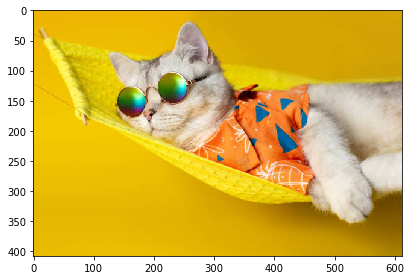

In [15]:
img = imread('cat.jpg')
array1 = get_gauss_pyramid(img, 4, 5) 
imshow(img)

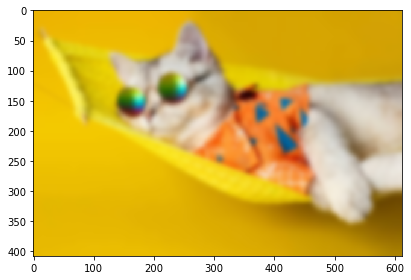

In [16]:
imshow(array1[0].astype('uint8'))

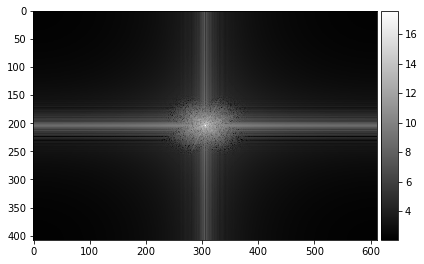

In [17]:
imshow(get_freq(array1[0]), cmap='gray')

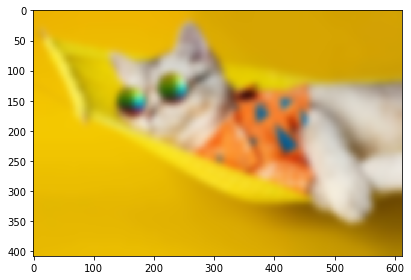

In [18]:
imshow(array1[1].astype('uint8'))

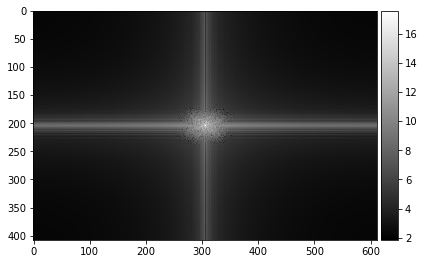

In [19]:
imshow(get_freq(array1[1]), cmap='gray')

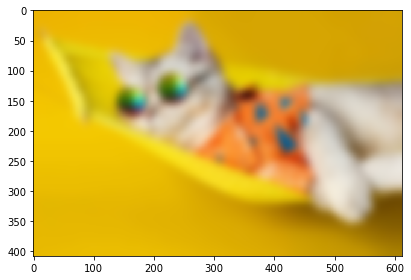

In [20]:
imshow(array1[2].astype('uint8'))

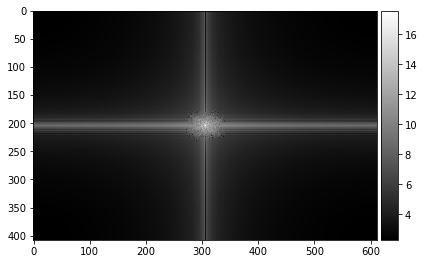

In [21]:
imshow(get_freq(array1[2]), cmap='gray')

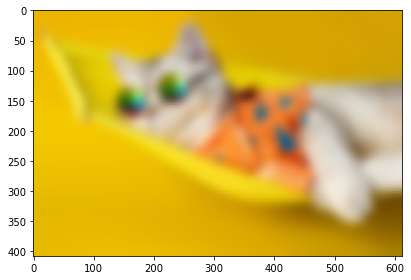

In [22]:
imshow(array1[3].astype('uint8'))

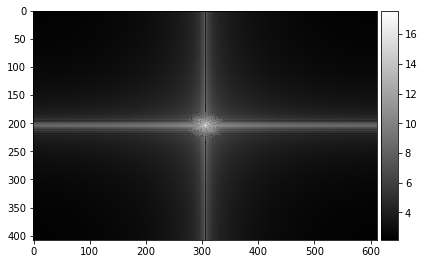

In [23]:
imshow(get_freq(array1[3]), cmap='gray')

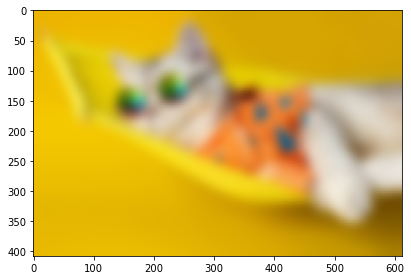

In [24]:
imshow(array1[4].astype('uint8'))

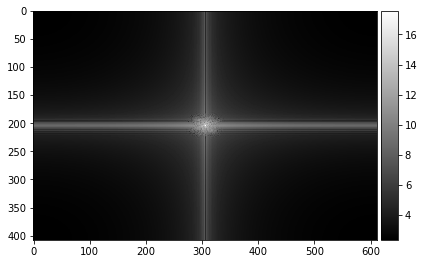

In [25]:
imshow(get_freq(array1[4]), cmap='gray')

# 2 Лапласовская пирамида

In [26]:
def get_laplace_pyramid(img, sigma, n_layers): 
    """
    Получает лапласовскую пирамиду с заданными sigma и количеством слоев
    Возвращает пирамиду
    """
    gauss_pyramid = get_gauss_pyramid(img, sigma, n_layers - 1) 
    laplace_pyramid = []
    laplace_pyramid.append(img.astype('float') - gauss_pyramid[0].astype('float'))
    for i in range(n_layers - 2):
        laplace_pyramid.append(gauss_pyramid[i].astype('float') - gauss_pyramid[i + 1].astype('float'))
    laplace_pyramid.append(gauss_pyramid[-1].astype('float'))
    return laplace_pyramid

# Визуализируем изображения и их частоты

In [27]:
array2 = get_laplace_pyramid(img, 1, 6)

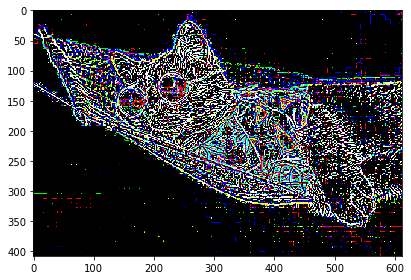

In [28]:
imshow(array2[0].astype('uint8'))

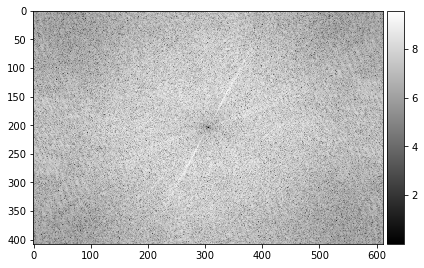

In [31]:
imshow(get_freq(array2[0]), cmap='gray')

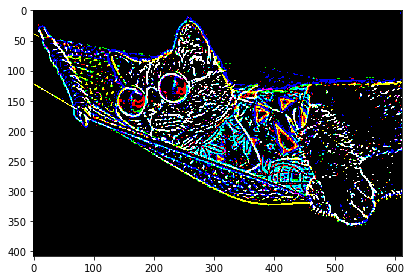

In [32]:
imshow(array2[1].astype('uint8'))

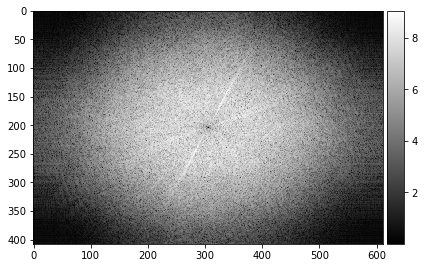

In [33]:
imshow(get_freq(array2[1]), cmap='gray')

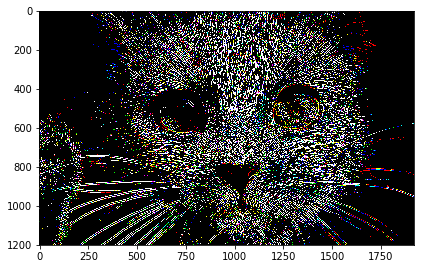

In [25]:
imshow(array2[2].astype('uint8'))

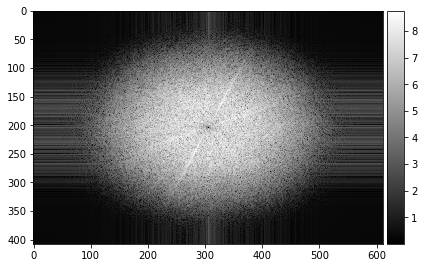

In [34]:
imshow(get_freq(array2[2]), cmap='gray')

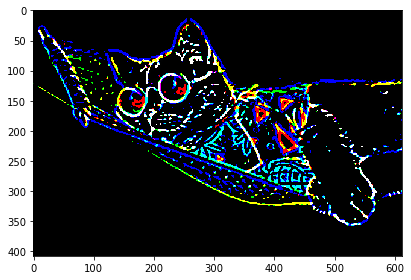

In [35]:
imshow(array2[3].astype('uint8'))

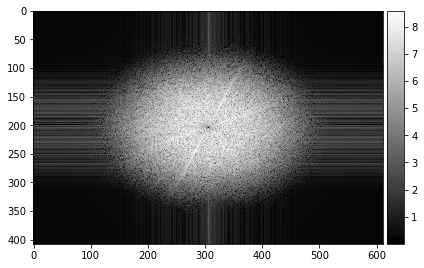

In [36]:
imshow(get_freq(array2[3]), cmap='gray')

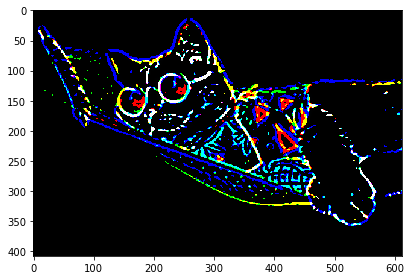

In [37]:
imshow(array2[4].astype('uint8'))

In [38]:
def glue_images(a, b, mask, sigma, n_layers):
    mask = np.dstack((mask, mask, mask))
    la = get_laplace_pyramid(a, sigma, n_layers)
    lb = get_laplace_pyramid(b, sigma, n_layers)
    gm = get_gauss_pyramid(mask, sigma, n_layers)
    ls = [gm[i] * la[i] + (1 - gm[i]) * lb[i] for i in range(n_layers)]
    img = ls[0]
    for i in range(n_layers - 1):
        img += ls[i + 1]
    img = np.clip(img, 0, 256).astype('uint8') 
    return img

# Коллаж со степика 

In [39]:
a = imread('a.png')
b = imread('b.png')
mask = imread('mask.png')
mask = (mask > 128).astype('uint')
res = glue_images(a,b,mask,5,5)

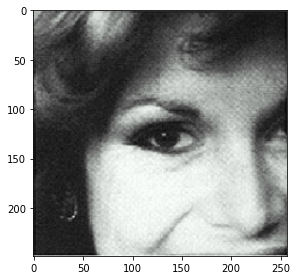

In [40]:
imshow(a)

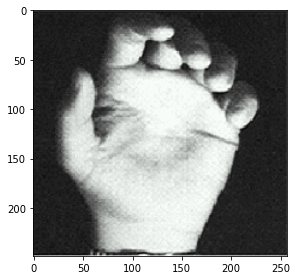

In [41]:
imshow(b)

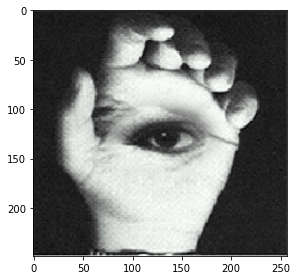

In [42]:
imshow(res)

# Собственные коллажи

# 1

In [49]:
a2 = imread('a22.jpg').astype('uint8')
b2 = imread('b22.jpg')
mask2 = imread('mask22.png')
mask2 = (mask2 > 128).astype('uint')
        
res = glue_images(a2,b2,mask2,5,5)

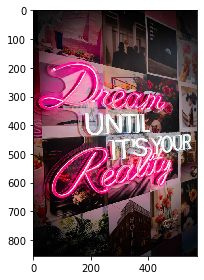

In [50]:
imshow(a2)

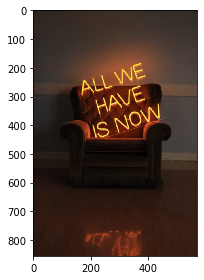

In [51]:
imshow(b2)

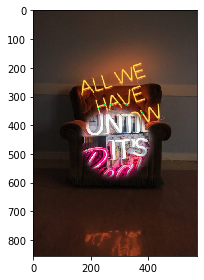

In [52]:
imshow(res)

# 2

In [61]:
a3 = imread('a23.jpg').astype('uint8')
b3 = imread('b23.jpg')
mask3 = imread('mask3.jpg')
mask3 = (mask3 > 128).astype('uint')
        
res = glue_images(a3,b3,mask3,5,5)

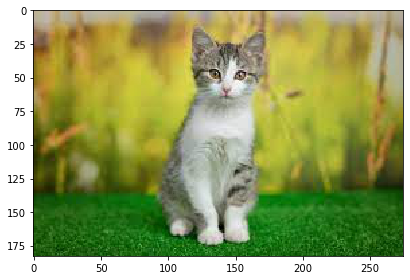

In [62]:
imshow(a3)

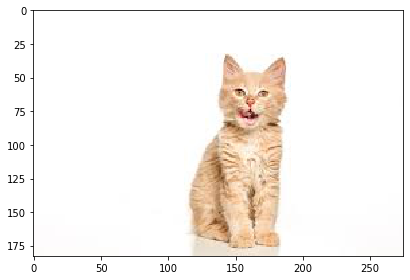

In [63]:
imshow(b3)

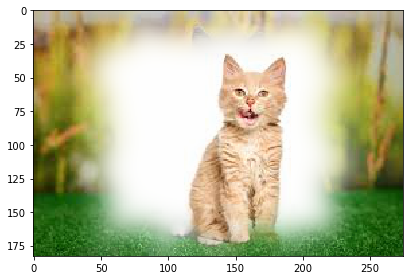

In [64]:
imshow(res)

# 3

In [66]:
a4 = imread('a24.jpg').astype('uint8')
b4 = imread('b24.jpg')
mask4 = imread('mask24.png')
mask4 = (mask4 > 128).astype('uint')
        
res = glue_images(a4,b4,mask4,5,5)

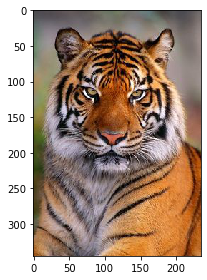

In [67]:
imshow(a4)

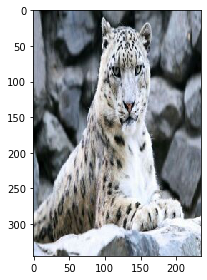

In [68]:
imshow(b4)

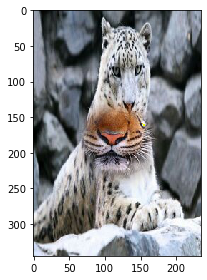

In [69]:
imshow(res)